# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# 1
y, X_modelo1 = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X_modelo1

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [4]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [5]:
# 2
modelo1 = sm.OLS(y, X_modelo1).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           2.64e-20
Time:                        18:18:05   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando o P value nenhuma das variáveis são (tão) significantes. Será refeito o modelo, porém sem a variável que se mostrou menos signficante, que é "sex" e será analisado o novo resultado.

In [6]:
modelo1 = smf.ols('tip ~ smoker + time + net_bill', data = tips).fit()
tips['tip_res'] = modelo1.resid
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.35
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           3.79e-21
Time:                        18:18:05   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             758.3
Df Residuals:                     240   BIC:                             772.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1978      0.221      5.412      0.000       0.762       1.634
smoker[T.No]       0.1405      0.150      0.934      0.351      -0.156       0.437
time[T.Dinner]     0.0591      0.165      0.358      0.721      -0.266       0.384
net_bill           0.0995      0.009     10.756      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.578   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.011
Skew:                           0.801   Prob(JB):                     4.63e-15
Kurtosis:                       4.982   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='sex', ylabel='tip_res'>

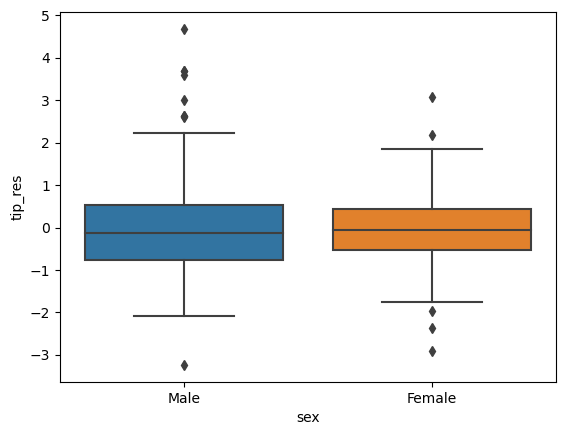

In [7]:
# Análise por box plot das variáveis removidas em função de "tip_res".
sns.boxplot(x = 'sex', y = 'tip_res', data = tips)

<Axes: xlabel='time', ylabel='tip_res'>

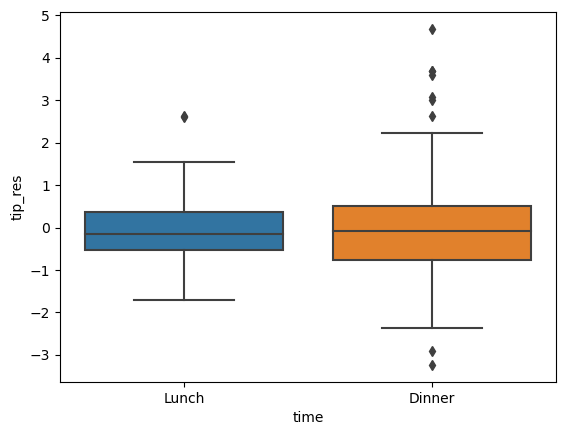

In [8]:
sns.boxplot(x = 'time', y = 'tip_res', data = tips)

Houve alterações nas duas variáveis restantes, porém ínfimas, será removida a variável "time" e será analisado novamente os resultados.

In [9]:
modelo1 = smf.ols('tip ~ smoker + net_bill', data = tips).fit()
tips['tip_res'] = modelo1.resid
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           4.56e-22
Time:                        18:18:06   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='smoker', ylabel='tip_res'>

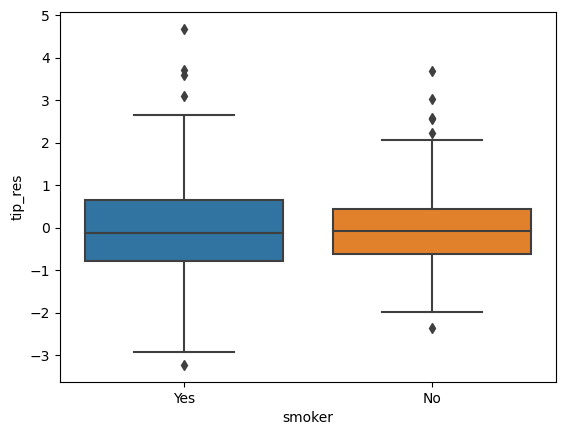

In [10]:
sns.boxplot(x = 'smoker', y = 'tip_res', data = tips)

Apenas "net_bill" se mostra uma variável significante. Desde o primeiro modelo até o último, com todas as removoções de variáveis, o modelo não teve melhora, ele explica 33,5% da variabilidade total dos dados. Fazer um último modelo apenas com "net_bill" que se mostrou muito a variável mais relevante do modelo.

In [11]:
modelo1 = smf.ols('tip ~ net_bill', data = tips).fit()
tips['tip_res'] = modelo1.resid
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           5.02e-23
Time:                        18:18:07   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

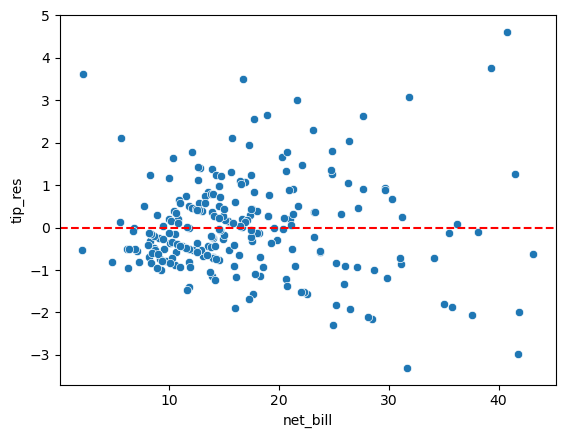

In [12]:
# 3
sns.scatterplot(x = 'net_bill', y = 'tip_res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           4.40e-20
Time:                        18:18:08   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2575      0.430     -2.924   

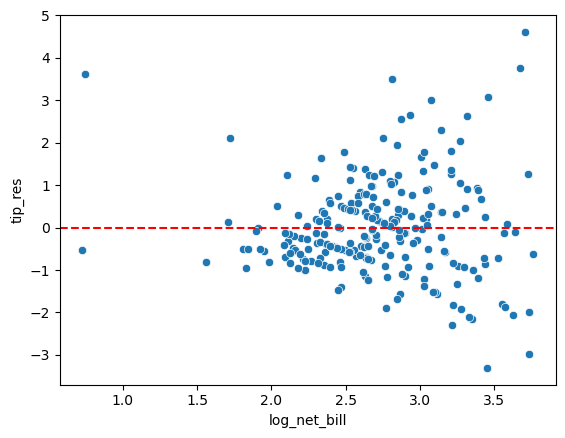

In [13]:
# 4 (log)
tips['log_net_bill'] = np.log(tips['net_bill'])
modelo1 = smf.ols('tip ~ log_net_bill', data = tips).fit()
print(modelo1.summary())

sns.scatterplot(x = 'log_net_bill', y = 'tip_res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           4.96e-22
Time:                        18:18:08   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0743      0.353  

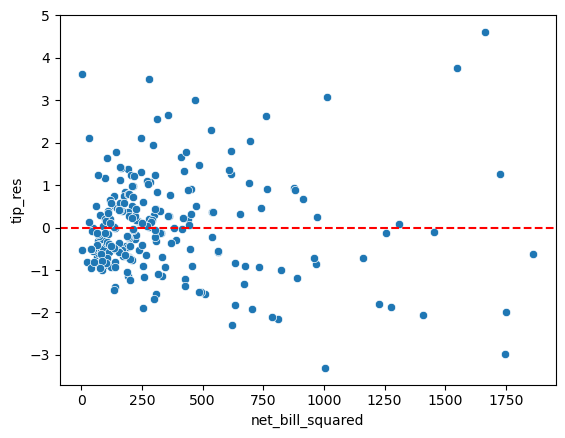

In [14]:
# 4 (polinômio)
tips['net_bill_squared'] = tips['net_bill'] ** 2
modelo1 = smf.ols('tip ~ net_bill + net_bill_squared', data = tips).fit()
print(modelo1.summary())

sns.scatterplot(x = 'net_bill_squared', y = 'tip_res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O melhor modelo é o em função do polinômio, com R-quadrado de 0,334.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [15]:
# 1
tips["log_tip"] = np.log(tips["tip"])

y, X_modelo2 = patsy.dmatrices('log_tip ~ sex + smoker + time + net_bill', tips)
X_modelo2

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [16]:
y

DesignMatrix with shape (244, 1)
  log_tip
  0.00995
  0.50682
  1.25276
  1.19695
  1.28371
  1.54969
  0.69315
  1.13783
  0.67294
  1.17248
  0.53649
  1.60944
  0.45108
  1.09861
  1.10526
  1.36609
  0.51282
  1.31103
  1.25276
  1.20896
  1.40610
  1.01160
  0.80200
  2.02551
  1.15688
  0.85015
  0.69315
  0.69315
  1.45862
  1.09861
  [214 rows omitted]
  Terms:
    'log_tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [17]:
# 2
modelo2 = sm.OLS(y, X_modelo2).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tip   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.21e-18
Time:                        18:18:09   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
modelo2 = smf.ols('log_tip ~ smoker + time + net_bill', data = tips).fit()
tips['log_tip_res'] = modelo2.resid
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tip   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     36.48
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.84e-19
Time:                        18:18:10   Log-Likelihood:                -97.423
No. Observations:                 244   AIC:                             202.8
Df Residuals:                     240   BIC:                             216.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4534      0.071      6.394      0.000       0.314       0.593
smoker[T.No]       0.0435      0.048      0.903      0.367      -0.051       0.138
time[T.Dinner]     0.0182      0.053      0.344      0.731      -0.086       0.122
net_bill           0.0303      0.003     10.228      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.521   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                2.175
Skew:                          -0.180   Prob(JB):                        0.337
Kurtosis:                       3.289   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='sex', ylabel='log_tip_res'>

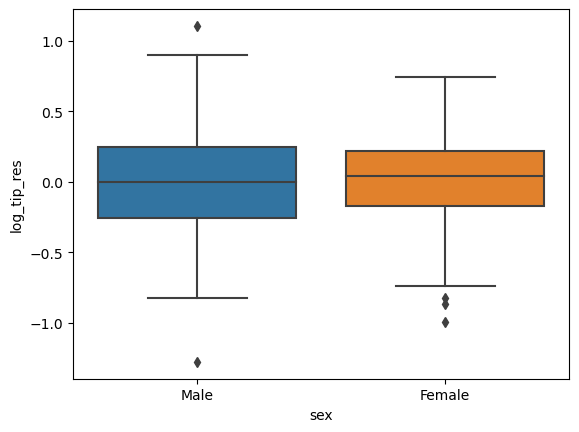

In [19]:
# Análise por box plot das variáveis removidas em função de "tip_pct_res".
sns.boxplot(x = 'sex', y = 'log_tip_res', data = tips)

<Axes: xlabel='time', ylabel='log_tip_res'>

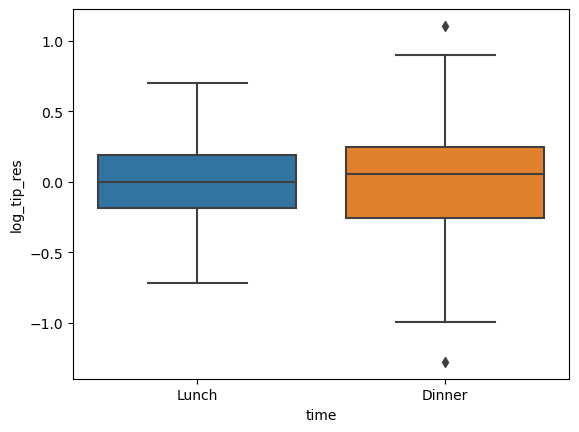

In [20]:
sns.boxplot(x = 'time', y = 'log_tip_res', data = tips)

In [21]:
modelo2 = smf.ols('log_tip ~ smoker + net_bill', data = tips).fit()
tips['log_tip_res'] = modelo2.resid
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tip   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           2.31e-20
Time:                        18:18:10   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='smoker', ylabel='log_tip_res'>

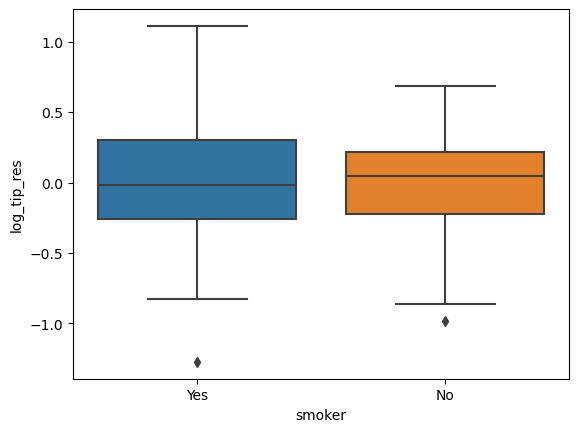

In [22]:
sns.boxplot(x = 'smoker', y = 'log_tip_res', data = tips)

In [23]:
modelo2 = smf.ols('log_tip ~ net_bill', data = tips).fit()
tips['log_tip_res'] = modelo2.resid
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tip   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           2.60e-21
Time:                        18:18:11   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

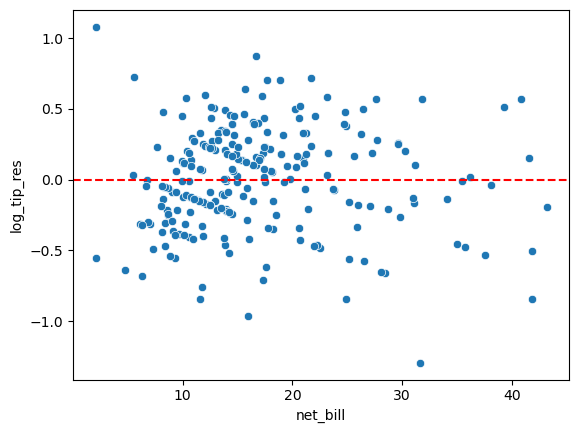

In [24]:
# 3
sns.scatterplot(x = 'net_bill', y = 'log_tip_res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           5.62e-22
Time:                        18:18:11   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

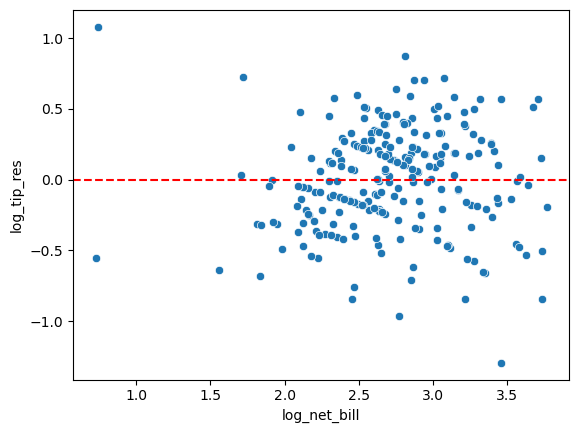

In [25]:
# 4 (log)
modelo2 = smf.ols('log_tip ~ log_net_bill', data = tips).fit()
print(modelo2.summary())

sns.scatterplot(x = 'log_net_bill', y = 'log_tip_res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           2.82e-22
Time:                        18:18:12   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1887      0.111  

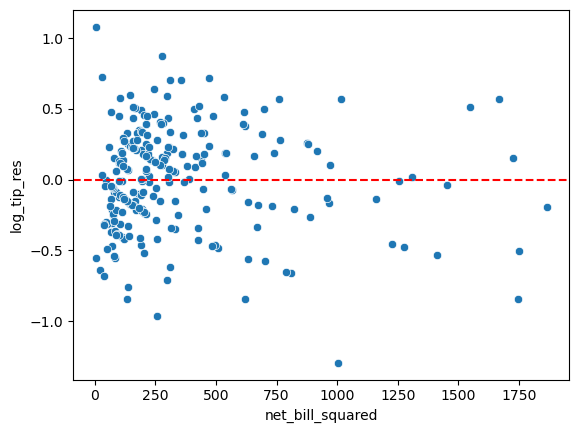

In [26]:
# 4 (polinômio)
modelo2 = smf.ols('log_tip ~ net_bill + net_bill_squared', data = tips).fit()
print(modelo2.summary())

sns.scatterplot(x = 'net_bill_squared', y = 'log_tip_res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [27]:
# 5
# R² para Modelo 1 (tip como resposta)
r2_modelo1 = r2_score(tips["tip"], modelo1.predict(tips))

print(f"R² - Modelo 1 (tip ~ transformação de net_bill): {r2_modelo1:.3f}")

R² - Modelo 1 (tip ~ transformação de net_bill): 0.334


In [28]:
# Previsões para o Modelo 2
tips["predicted_log_tip"] = modelo2.predict(tips)

# Reverter log para obter tip
tips["predicted_tip"] = np.exp(tips["predicted_log_tip"])

# Calcular R² para Modelo B na escala de tip
r2_modelo2 = r2_score(tips["tip"], tips["predicted_tip"])

print(f"R² - Modelo 2 (log_tip ~ transformação de net_bill) [convertido]: {r2_modelo2:.3f}")

R² - Modelo 2 (log_tip ~ transformação de net_bill) [convertido]: 0.309


In [29]:
if r2_modelo2 > r2_modelo1:
    print("O Modelo 2 (log_tip) tem um melhor ajuste, indicando que a transformação log melhorou o modelo.")
elif r2_modelo2 < r2_modelo1:
    print("O Modelo 1 (tip sem transformação) tem um melhor ajuste, indicando que a transformação log não foi benéfica.")
else:
    print("Os dois modelos têm o mesmo R², então ambos explicam igualmente bem o tip.")

O Modelo 1 (tip sem transformação) tem um melhor ajuste, indicando que a transformação log não foi benéfica.


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [30]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [31]:
# 1
modelo_renda1 = smf.ols('renda ~ tempo_emprego', data = previsao_renda).fit()
previsao_renda['renda_res'] = modelo_renda1.resid
modelo_renda1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:13   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

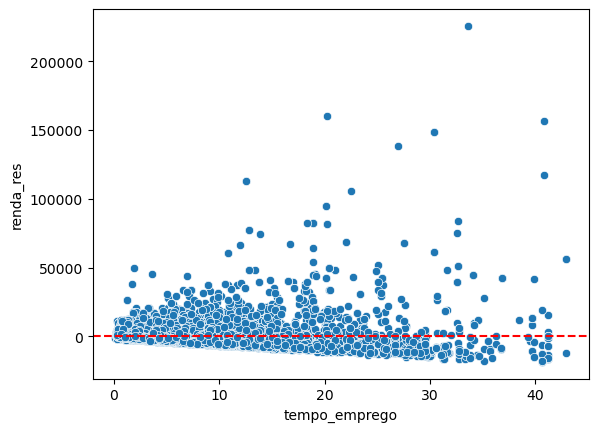

In [32]:
# 2
sns.scatterplot(x = 'tempo_emprego', y = 'renda_res', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1250.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          5.60e-261
Time:                        18:18:14   Log-Likelihood:            -1.3003e+05
No. Observations:               12427   AIC:                         2.601e+05
Df Residuals:                   12425   BIC:                         2.601e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1725.2452    145.62

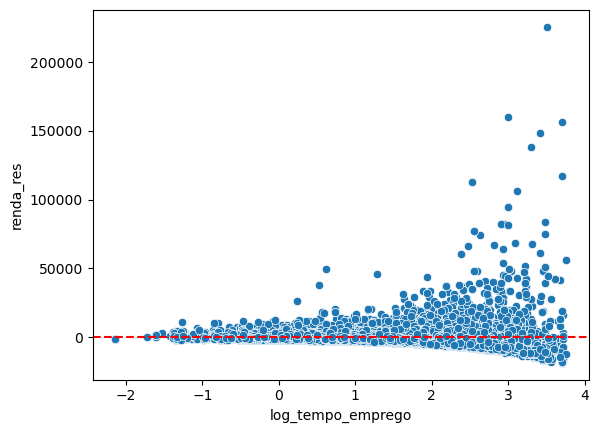

In [33]:
# Modelo com Log Tempo de Emprego
previsao_renda['log_tempo_emprego'] = np.log(previsao_renda['tempo_emprego'])
modelo_renda2 = smf.ols('renda ~ log_tempo_emprego', data = previsao_renda).fit()
print(modelo_renda2.summary())

sns.scatterplot(x = 'log_tempo_emprego', y = 'renda_res', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:15   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2965.33

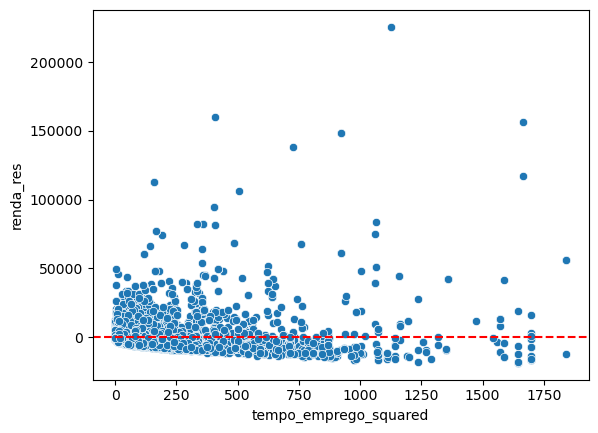

In [34]:
# Modelo com Polinômio Tempo de Emprego
previsao_renda['tempo_emprego_squared'] = previsao_renda['tempo_emprego'] ** 2
modelo_renda3 = smf.ols('renda ~ tempo_emprego + tempo_emprego_squared', data = previsao_renda).fit()
print(modelo_renda3.summary())

sns.scatterplot(x = 'tempo_emprego_squared', y = 'renda_res', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:15   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851

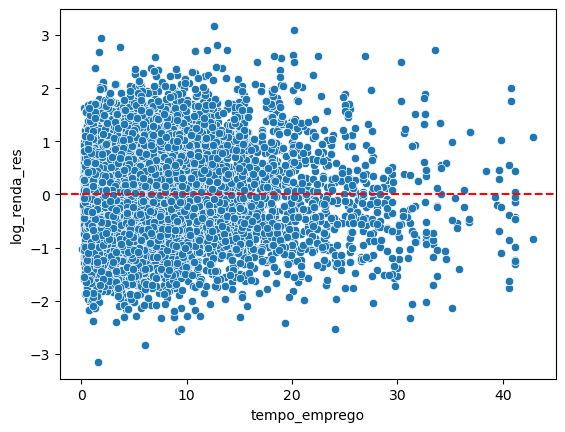

In [35]:
# Modelo com Log Renda
previsao_renda['log_renda'] = np.log(previsao_renda['renda'])
modelo_renda4 = smf.ols('log_renda ~ tempo_emprego', data = previsao_renda).fit()
previsao_renda['log_renda_res'] = modelo_renda4.resid
print(modelo_renda4.summary())

sns.scatterplot(x = 'tempo_emprego', y = 'log_renda_res', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2069.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:16   Log-Likelihood:                -15359.
No. Observations:               12427   AIC:                         3.072e+04
Df Residuals:                   12425   BIC:                         3.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.7112      0.01

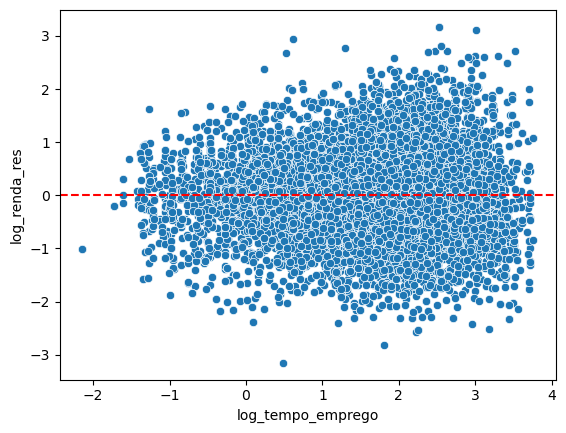

In [36]:
# Modelo com Log Renda e Tempo Emprego
modelo_renda5 = smf.ols('log_renda ~ log_tempo_emprego', data = previsao_renda).fit()
print(modelo_renda5.summary())

sns.scatterplot(x = 'log_tempo_emprego', y = 'log_renda_res', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:          renda_squared   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     513.7
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          1.78e-111
Time:                        18:18:17   Log-Likelihood:            -2.7420e+05
No. Observations:               12427   AIC:                         5.484e+05
Df Residuals:                   12425   BIC:                         5.484e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.001e+08   1.27e+07     -7.909

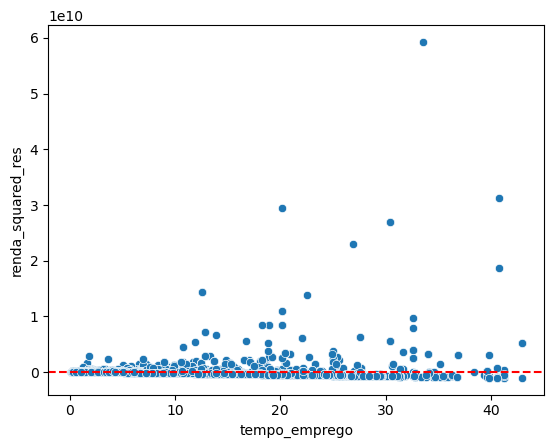

In [37]:
# Modelo com Polinômio Renda
previsao_renda['renda_squared'] = previsao_renda['renda'] ** 2
modelo_renda6 = smf.ols('renda_squared ~ tempo_emprego', data = previsao_renda).fit()
previsao_renda['renda_squared_res'] = modelo_renda6.resid
print(modelo_renda6.summary())

sns.scatterplot(x = 'tempo_emprego', y = 'renda_squared_res', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:          renda_squared   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     344.7
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          1.95e-146
Time:                        18:18:18   Log-Likelihood:            -2.7412e+05
No. Observations:               12427   AIC:                         5.482e+05
Df Residuals:                   12424   BIC:                         5.483e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.831e+

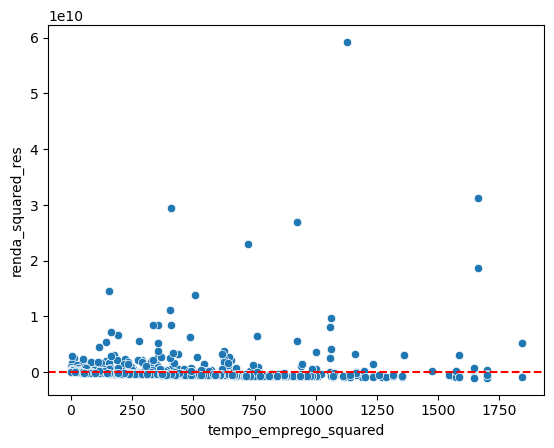

In [38]:
# Modelo com Polinômio Renda Tempo Emprego
modelo_renda7 = smf.ols('renda_squared ~ tempo_emprego + tempo_emprego_squared', data = previsao_renda).fit()
print(modelo_renda7.summary())

sns.scatterplot(x = 'tempo_emprego_squared', y = 'renda_squared_res', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

In [39]:
r2_modelo_renda1 = modelo_renda1.rsquared
r2_modelo_renda2 = modelo_renda2.rsquared
r2_modelo_renda3 = modelo_renda3.rsquared
r2_modelo_renda4 = modelo_renda4.rsquared
r2_modelo_renda5 = modelo_renda5.rsquared
r2_modelo_renda6 = modelo_renda6.rsquared
r2_modelo_renda7 = modelo_renda7.rsquared

In [40]:
melhor_modelo = max([(r2_modelo_renda1, 'Modelo 1'),
                     (r2_modelo_renda2, 'Modelo 2'),
                     (r2_modelo_renda3, 'Modelo 3'),
                     (r2_modelo_renda4, 'Modelo 4'),
                     (r2_modelo_renda5, 'Modelo 5'),
                     (r2_modelo_renda6, 'Modelo 6'),
                     (r2_modelo_renda7, 'Modelo 7')], key=lambda x: x[0])
print(f"\nO melhor modelo é: {melhor_modelo[1]} com R² = {melhor_modelo[0]:.3f}")


O melhor modelo é: Modelo 4 com R² = 0.171


Foi possível melhor o modelo utilizando o Log Renda por Tempo de Emprego.

In [41]:
# 3
previsao_renda.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'renda_res', 'log_tempo_emprego',
       'tempo_emprego_squared', 'log_renda', 'log_renda_res', 'renda_squared',
       'renda_squared_res'],
      dtype='object')

In [42]:
# Modelo com todas as variáveis
modelo_renda8 = smf.ols('renda ~ data_ref + id_cliente + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia',
                        data = previsao_renda).fit()
modelo_renda8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:20   Log-Likelihood:            -1.2878e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12387   BIC:                         2.579e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5759.2442   2520.039     -2.285      0.022   -1.07e+04    -819.575
data_ref[T.2015-02-01]             -51.9151    377.096     -0.138      0.891    -791.082     687.252
data_ref[T.2015-03-01]             222.9354    378.084      0.590      0.555    -518.168     964.039
data_ref[T.2015-04-01]             642.3659    376.953      1.704      0.088     -96.520    1381.252
data_ref[T.2015-05-01]             176.5809    375.914      0.470      0.639    -560.270     913.432
data_ref[T.2015-06-01]             642.6161    377.479      1.702      0.089     -97.302    1382.534
data_ref[T.2015-07-01]             366.5612    376.191      0.974      0.330    -370.831    1103.954
data_ref[T.2015-08-01]             207.0676    377.492      0.549      0.583    -532.875     947.010
data_ref[T.2015-09-01]             150.6806    374.958      0.402      0.688    -584.296     885.657
data_ref[T.2015-10-01]             272.5373    377.511      0.722      0.470    -467.442    1012.517
data_ref[T.2015-11-01]             444.1329    377.686      1.176      0.240    -296.190    1184.455
data_ref[T.2015-12-01]             624.4096    378.999      1.648      0.099    -118.488    1367.307
data_ref[T.2016-01-01]             302.4136    377.447      0.801      0.423    -437.441    1042.268
data_ref[T.2016-02-01]             -43.5417    377.367     -0.115      0.908    -783.239     696.155
data_ref[T.2016-03-01]              60.1761    380.722      0.158      0.874    -686.098     806.450
sexo[T.M]                         6056.3382    155.940     38.838      0.000    5750.672    6362.005
posse_de_veiculo[T.True]            42.9217    150.594      0.285      0.776    -252.267     338.110
posse_de_imovel[T.True]            352.5163    149.455      2.359      0.018      59.561     645.472
tipo_renda[T.Bolsista]           -1377.8362   2568.569     -0.536      0.592   -6412.631    3656.958
tipo_renda[T.Empresário]           828.6254    158.916      5.214      0.000     517.125    1140.126
tipo_renda[T.Pensionista]        -2632.1209   2569.530     -1.024      0.306   -7668.798    2404.557
tipo_renda[T.Servidor público]     138.3702    236.531      0.585      0.559    -325.267     602.007
educacao[T.Pós graduação]         1010.8977   1691.642      0.598      0.550   -2304.984    4326.780
educacao[T.Secundário]             560.1259    766.269      0.731      0.465    -941.881    2062.133
educacao[T.Superior completo]     1177.9727    769.202      1.531      0.126    -329.783    2685.729
educacao[T.Superior incompleto]    150.1649    828.061      0.181      0.856   -1472.963    1773.293
estado_civil[T.Separado]          1150.7179   1183.904      0.972      0.331   -1169.919    3471.354
estado_civil[T.Solteiro]           817.3819   1158.94

In [43]:
# Retirando as variáveis menos significantes uma a uma
modelo_renda8 = smf.ols('renda ~ id_cliente + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia',
                        data = previsao_renda).fit()
modelo_renda8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     170.9
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:21   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12401   BIC:                         2.578e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5509.0878   2504.590     -2.200      0.028   -1.04e+04    -599.702
sexo[T.M]                         6054.4114    155.873     38.842      0.000    5748.876    6359.947
posse_de_veiculo[T.True]            43.7778    150.513      0.291      0.771    -251.251     338.806
posse_de_imovel[T.True]            355.6678    149.350      2.381      0.017      62.919     648.417
tipo_renda[T.Bolsista]           -1448.0898   2567.360     -0.564      0.573   -6480.514    3584.335
tipo_renda[T.Empresário]           822.4707    158.831      5.178      0.000     511.138    1133.803
tipo_renda[T.Pensionista]        -2591.4847   2568.059     -1.009      0.313   -7625.279    2442.310
tipo_renda[T.Servidor público]     136.6082    236.331      0.578      0.563    -326.637     599.854
educacao[T.Pós graduação]         1084.3411   1690.438      0.641      0.521   -2229.181    4397.863
educacao[T.Secundário]             597.1941    765.802      0.780      0.436    -903.898    2098.286
educacao[T.Superior completo]     1217.9491    768.634      1.585      0.113    -288.694    2724.592
educacao[T.Superior incompleto]    204.0614    827.364      0.247      0.805   -1417.701    1825.824
estado_civil[T.Separado]          1147.4103   1183.110      0.970      0.332   -1171.669    3466.490
estado_civil[T.Solteiro]           811.8637   1158.267      0.701      0.483   -1458.519    3082.246
estado_civil[T.União]             -480.5670    267.801     -1.794      0.073   -1005.499      44.365
estado_civil[T.Viúvo]             1040.2748   1229.527      0.846      0.398   -1369.788    3450.338
tipo_residencia[T.Casa]           -286.1241    576.031     -0.497      0.619   -1415.235     842.987
tipo_residencia[T.Com os pais]    -375.7455    642.061     -0.585      0.558   -1634.285     882.794
tipo_residencia[T.Comunitário]    -438.1813   1120.865     -0.391      0.696   -2635.250    1758.887
tipo_residencia[T.Estúdio]          94.7343   1056.428      0.090      0.929   -1976.030    2165.498
tipo_residencia[T.Governamental]    81.8077    701.784      0.117      0.907   -1293.797    1457.412
id_cliente                          -0.0116      0.015     -0.799      0.424      -0.040       0.017
qtd_filhos                       -1121.3223   1147.951     -0.977      0.329   -3371.485    1128.841
idade                               41.9518      8.518      4.925      0.000      25.256      58.648
tempo_emprego                      554.4870     11.050     50.182      0.000     532.828     576.146
qt_pessoas_residencia             1265.6023   1145.897      1.104      0.269    -980.533    3511.738
==============================================================================
Omnibus:                    17570.856   Durbin-Watson:                   2.

In [44]:
modelo_renda8 = smf.ols('renda ~ id_cliente + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + idade + tempo_emprego + qt_pessoas_residencia',
                        data = previsao_renda).fit()
modelo_renda8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     213.6
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:22   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12406   BIC:                         2.578e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -5821.9381   2443.092     -2.383      0.017   -1.06e+04   -1033.099
sexo[T.M]                        6058.0088    155.430     38.976      0.000    5753.342    6362.676
posse_de_veiculo[T.True]           44.2618    150.416      0.294      0.769    -250.577     339.101
posse_de_imovel[T.True]           342.9481    146.552      2.340      0.019      55.683     630.213
tipo_renda[T.Bolsista]          -1457.5101   2566.943     -0.568      0.570   -6489.117    3574.097
tipo_renda[T.Empresário]          827.7644    158.555      5.221      0.000     516.973    1138.556
tipo_renda[T.Pensionista]       -2599.1627   2567.329     -1.012      0.311   -7631.526    2433.201
tipo_renda[T.Servidor público]    139.2110    236.082      0.590      0.555    -323.547     601.969
educacao[T.Pós graduação]        1071.5817   1688.879      0.634      0.526   -2238.882    4382.046
educacao[T.Secundário]            595.9159    763.442      0.781      0.435    -900.550    2092.381
educacao[T.Superior completo]    1211.1483    766.741      1.580      0.114    -291.782    2714.079
educacao[T.Superior incompleto]   194.2525    825.611      0.235      0.814   -1424.072    1812.577
estado_civil[T.Separado]         1155.9704   1182.793      0.977      0.328   -1162.488    3474.429
estado_civil[T.Solteiro]          831.4730   1157.854      0.718      0.473   -1438.102    3101.047
estado_civil[T.União]            -485.8780    267.568     -1.816      0.069   -1010.353      38.597
estado_civil[T.Viúvo]            1053.6711   1229.202      0.857      0.391   -1355.756    3463.098
id_cliente                         -0.0120      0.014     -0.824      0.410      -0.040       0.016
qtd_filhos                      -1138.0205   1147.598     -0.992      0.321   -3387.491    1111.450
idade                              42.4185      8.438      5.027      0.000      25.879      58.958
tempo_emprego                     554.5346     11.034     50.257      0.000     532.906     576.163
qt_pessoas_residencia            1281.3878   1145.567      1.119      0.263    -964.101    3526.877
==============================================================================
Omnibus:                    17578.141   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9921666.952
Skew:                           8.132   Prob(JB):                         0.00
Kurtosis:                     140.466   Cond. No.                     4.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+05. This might indicate that there are
strong multicollinearity or o

In [45]:
modelo_renda8 = smf.ols('renda ~ id_cliente + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + estado_civil + idade + tempo_emprego + qt_pessoas_residencia',
                        data = previsao_renda).fit()
modelo_renda8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     265.3
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:22   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12410   BIC:                         2.578e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -4936.2841   2326.505     -2.122      0.034   -9496.596    -375.972
sexo[T.M]                       6011.6255    155.187     38.738      0.000    5707.435    6315.816
posse_de_veiculo[T.True]         100.3820    149.989      0.669      0.503    -193.619     394.383
posse_de_imovel[T.True]          363.3391    146.494      2.480      0.013      76.188     650.491
tipo_renda[T.Bolsista]          -989.6063   2566.565     -0.386      0.700   -6020.472    4041.260
tipo_renda[T.Empresário]         886.5554    157.970      5.612      0.000     576.910    1196.201
tipo_renda[T.Pensionista]      -2261.8814   2568.209     -0.881      0.378   -7295.970    2772.207
tipo_renda[T.Servidor público]   249.3401    235.031      1.061      0.289    -211.357     710.037
estado_civil[T.Separado]        1141.2029   1183.644      0.964      0.335   -1178.923    3461.329
estado_civil[T.Solteiro]         795.8388   1158.666      0.687      0.492   -1475.326    3067.004
estado_civil[T.União]           -505.5954    267.713     -1.889      0.059   -1030.355      19.164
estado_civil[T.Viúvo]            990.1932   1229.917      0.805      0.421   -1420.635    3401.021
id_cliente                        -0.0100      0.014     -0.691      0.490      -0.038       0.018
qtd_filhos                     -1079.0322   1148.380     -0.940      0.347   -3330.036    1171.972
idade                             41.0698      8.322      4.935      0.000      24.758      57.382
tempo_emprego                    554.8732     11.037     50.273      0.000     533.239     576.508
qt_pessoas_residencia           1231.9921   1146.365      1.075      0.283   -1015.061    3479.046
==============================================================================
Omnibus:                    17549.932   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9815049.183
Skew:                           8.109   Prob(JB):                         0.00
Kurtosis:                     139.721   Cond. No.                     4.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
previsao_renda['tipo_renda'].unique()

array(['Empresário', 'Assalariado', 'Servidor público', 'Pensionista',
       'Bolsista'], dtype=object)

In [47]:
modelo_renda8 = smf.ols('renda ~ id_cliente + sexo + posse_de_imovel + qtd_filhos + tipo_renda + estado_civil + idade + tempo_emprego + qt_pessoas_residencia',
                        data = previsao_renda).fit()
modelo_renda8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     282.9
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:23   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12411   BIC:                         2.578e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -4882.8699   2325.084     -2.100      0.036   -9440.396    -325.344
sexo[T.M]                       6043.8598    147.521     40.970      0.000    5754.697    6333.023
posse_de_imovel[T.True]          365.7971    146.445      2.498      0.013      78.742     652.852
tipo_renda[T.Bolsista]         -1023.2504   2566.016     -0.399      0.690   -6053.040    4006.539
tipo_renda[T.Empresário]         888.8291    157.930      5.628      0.000     579.262    1198.396
tipo_renda[T.Pensionista]      -2254.1332   2568.126     -0.878      0.380   -7288.059    2779.793
tipo_renda[T.Servidor público]   249.3418    235.026      1.061      0.289    -211.345     710.028
estado_civil[T.Separado]        1121.3229   1183.245      0.948      0.343   -1198.021    3440.667
estado_civil[T.Solteiro]         779.8577   1158.394      0.673      0.501   -1490.774    3050.490
estado_civil[T.União]           -518.5364    267.008     -1.942      0.052   -1041.914       4.841
estado_civil[T.Viúvo]            978.9243   1229.774      0.796      0.426   -1431.624    3389.473
id_cliente                        -0.0104      0.014     -0.718      0.473      -0.039       0.018
qtd_filhos                     -1073.6986   1148.327     -0.935      0.350   -3324.598    1177.201
idade                             40.7923      8.311      4.908      0.000      24.501      57.084
tempo_emprego                    554.7788     11.036     50.270      0.000     533.146     576.411
qt_pessoas_residencia           1228.5765   1146.328      1.072      0.284   -1018.405    3475.558
==============================================================================
Omnibus:                    17548.678   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9814623.530
Skew:                           8.108   Prob(JB):                         0.00
Kurtosis:                     139.718   Cond. No.                     4.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
modelo_renda8 = smf.ols('renda ~ id_cliente + sexo + posse_de_imovel + qtd_filhos + tipo_renda + idade + tempo_emprego + qt_pessoas_residencia',
                        data = previsao_renda).fit()
modelo_renda8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     385.3
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:23   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12415   BIC:                         2.577e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -3153.2137    481.134     -6.554      0.000   -4096.311   -2210.116
sexo[T.M]                       6052.4274    146.725     41.250      0.000    5764.824    6340.030
posse_de_imovel[T.True]          366.4115    146.224      2.506      0.012      79.790     653.033
tipo_renda[T.Bolsista]          -992.1065   2565.947     -0.387      0.699   -6021.761    4037.548
tipo_renda[T.Empresário]         875.1744    157.734      5.548      0.000     565.992    1184.357
tipo_renda[T.Pensionista]      -2324.9053   2566.590     -0.906      0.365   -7355.819    2706.009
tipo_renda[T.Servidor público]   247.1720    234.899      1.052      0.293    -213.266     707.610
id_cliente                        -0.0102      0.014     -0.703      0.482      -0.039       0.018
qtd_filhos                      -121.6342    205.191     -0.593      0.553    -523.840     280.571
idade                             43.1541      8.143      5.300      0.000      27.193      59.115
tempo_emprego                    554.3088     11.025     50.276      0.000     532.697     575.920
qt_pessoas_residencia            290.0880    171.393      1.693      0.091     -45.869     626.045
==============================================================================
Omnibus:                    17548.782   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9810977.687
Skew:                           8.108   Prob(JB):                         0.00
Kurtosis:                     139.692   Cond. No.                     3.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
modelo_renda8 = smf.ols('renda ~ id_cliente + sexo + posse_de_imovel + tipo_renda + idade + tempo_emprego + qt_pessoas_residencia',
                        data = previsao_renda).fit()
modelo_renda8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     423.8
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:24   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12416   BIC:                         2.577e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -3033.7494    436.882     -6.944      0.000   -3890.106   -2177.393
sexo[T.M]                       6059.0391    146.296     41.416      0.000    5772.276    6345.802
posse_de_imovel[T.True]          364.8744    146.197      2.496      0.013      78.305     651.444
tipo_renda[T.Bolsista]          -958.8712   2565.267     -0.374      0.709   -5987.193    4069.451
tipo_renda[T.Empresário]         875.6791    157.727      5.552      0.000     566.509    1184.849
tipo_renda[T.Pensionista]      -2379.8529   2564.848     -0.928      0.353   -7407.353    2647.648
tipo_renda[T.Servidor público]   245.8823    234.883      1.047      0.295    -214.524     706.289
id_cliente                        -0.0100      0.014     -0.689      0.491      -0.038       0.018
idade                             43.7852      8.072      5.424      0.000      27.962      59.608
tempo_emprego                    554.1703     11.023     50.276      0.000     532.564     575.776
qt_pessoas_residencia            199.0949     76.242      2.611      0.009      49.650     348.540
==============================================================================
Omnibus:                    17551.884   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9820299.815
Skew:                           8.111   Prob(JB):                         0.00
Kurtosis:                     139.757   Cond. No.                     3.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
modelo_renda8 = smf.ols('renda ~ sexo + posse_de_imovel + tipo_renda + idade + tempo_emprego + qt_pessoas_residencia',
                        data = previsao_renda).fit()
modelo_renda8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     470.8
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:24   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12417   BIC:                         2.577e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -3122.2199    417.577     -7.477      0.000   -3940.735   -2303.704
sexo[T.M]                       6058.7836    146.293     41.415      0.000    5772.027    6345.540
posse_de_imovel[T.True]          374.0453    145.587      2.569      0.010      88.672     659.418
tipo_renda[T.Bolsista]          -885.5077   2563.002     -0.345      0.730   -5909.390    4138.375
tipo_renda[T.Empresário]         876.2309    157.722      5.556      0.000     567.072    1185.390
tipo_renda[T.Pensionista]      -2459.6417   2562.179     -0.960      0.337   -7481.909    2562.626
tipo_renda[T.Servidor público]   245.8026    234.878      1.047      0.295    -214.594     706.199
idade                             43.8046      8.072      5.427      0.000      27.982      59.627
tempo_emprego                    554.3968     11.017     50.320      0.000     532.801     575.993
qt_pessoas_residencia            197.3962     76.200      2.590      0.010      48.032     346.760
==============================================================================
Omnibus:                    17550.092   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9819887.098
Skew:                           8.109   Prob(JB):                         0.00
Kurtosis:                     139.755   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Tipo de Renda tem um valor altamente significante (Empresário) enquanto os outros não, optarei por remover a variável do modelo.

In [51]:
modelo_renda8 = smf.ols('renda ~ sexo + posse_de_imovel + idade + tempo_emprego + qt_pessoas_residencia',
                        data = previsao_renda).fit()
modelo_renda8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     839.2
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:24   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12421   BIC:                         2.577e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2680.7376    409.502     -6.546      0.000   -3483.425   -1878.050
sexo[T.M]                6016.3560    146.130     41.171      0.000    5729.919    6302.793
posse_de_imovel[T.True]   384.0403    145.706      2.636      0.008      98.433     669.647
idade                      41.9666      8.070      5.201      0.000      26.149      57.784
tempo_emprego             549.8071     10.905     50.417      0.000     528.431     571.183
qt_pessoas_residencia     174.6714     76.140      2.294      0.022      25.426     323.917
==============================================================================
Omnibus:                    17509.753   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9684128.294
Skew:                           8.076   Prob(JB):                         0.00
Kurtosis:                     138.801   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

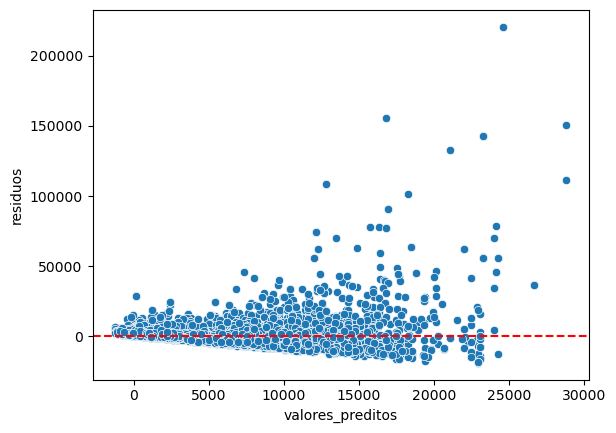

In [52]:
# 5
previsao_renda['residuos'] = modelo_renda8.resid
previsao_renda['valores_preditos'] = modelo_renda8.fittedvalues

sns.scatterplot(x = 'valores_preditos', y = 'residuos', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

C:\Users\Kelvi Orloviki\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Kelvi Orloviki\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     1486.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          1.68e-306
Time:                        18:18:25   Log-Likelihood:            -1.2522e+05
No. Observations:               11962   AIC:                         2.504e+05
Df Residuals:                   11960   BIC:                         2.505e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.844e+04 

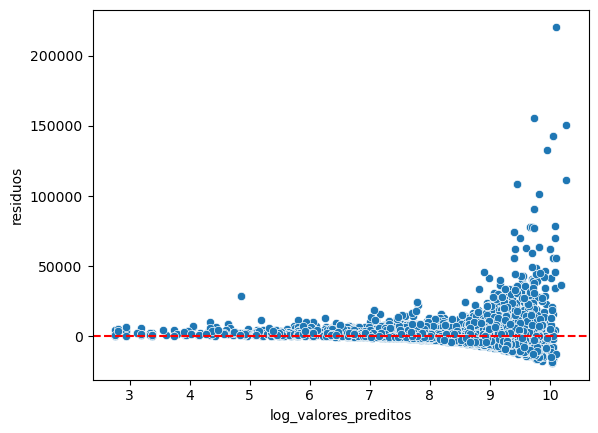

In [53]:
previsao_renda['log_valores_preditos'] = np.log(previsao_renda['valores_preditos'])
previsao_renda['log_residuos'] = np.log(previsao_renda['residuos'])
modelo_renda9 = smf.ols('renda ~ log_valores_preditos', data = previsao_renda).fit()
print(modelo_renda9.summary())

sns.scatterplot(x = 'log_valores_preditos', y = 'residuos', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

O modelo pode não estar sendo calculado de forma ideal por haver números negativos ou igual a "0" no Log. Os dados serão tratados para ver se há alteração com essa correção.

In [54]:
print(previsao_renda['valores_preditos'].describe())
print(previsao_renda['valores_preditos'][previsao_renda['valores_preditos'] <= 0])

count    12427.000000
mean      6116.539763
std       4467.241784
min      -1260.870360
25%       2391.384485
50%       5878.009452
75%       8800.214700
max      28795.417768
Name: valores_preditos, dtype: float64
2        -17.591096
58       -26.701399
60       -17.591096
67      -271.107152
85      -290.340838
            ...    
14719    -17.404346
14774   -326.386856
14849   -958.520746
14866   -674.169827
14912    -40.152606
Name: valores_preditos, Length: 465, dtype: float64


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     1486.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          1.68e-306
Time:                        18:18:26   Log-Likelihood:            -1.2522e+05
No. Observations:               11962   AIC:                         2.504e+05
Df Residuals:                   11960   BIC:                         2.505e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

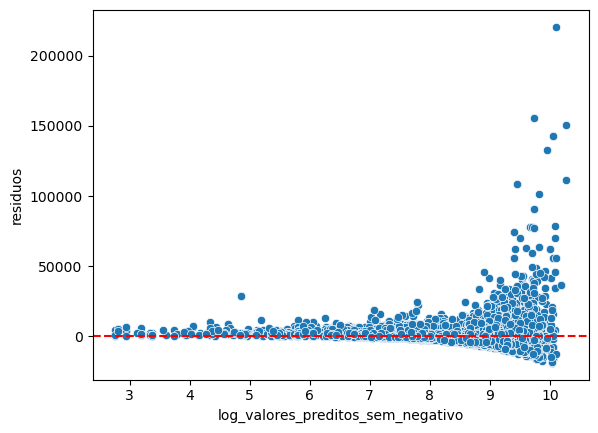

In [55]:
previsao_renda_preditos = previsao_renda[previsao_renda['valores_preditos'] > 0].copy() # Remover valores negativos do Log, criaando um novo dataframe e modelo
previsao_renda_preditos['log_valores_preditos_sem_negativo'] = np.log(previsao_renda_preditos['valores_preditos'])
modelo_renda9 = smf.ols('renda ~ log_valores_preditos_sem_negativo', data = previsao_renda_preditos).fit()
print(modelo_renda9.summary())

sns.scatterplot(x = 'log_valores_preditos_sem_negativo', y = 'residuos', data = previsao_renda_preditos)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:           log_residuos   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     666.6
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          1.37e-138
Time:                        18:18:27   Log-Likelihood:                -8972.7
No. Observations:                5328   AIC:                         1.795e+04
Df Residuals:                    5326   BIC:                         1.796e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.1714      0.024  

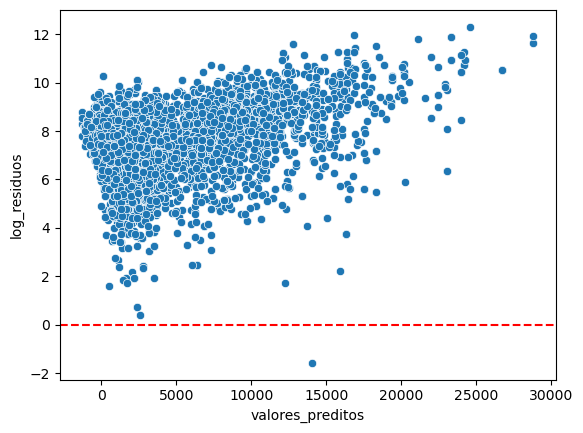

In [56]:
modelo_renda10 = smf.ols('log_residuos ~ valores_preditos', data = previsao_renda).fit()
print(modelo_renda10.summary())

sns.scatterplot(x = 'valores_preditos', y = 'log_residuos', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:           log_residuos   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     286.0
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           2.20e-62
Time:                        18:18:27   Log-Likelihood:                -8511.3
No. Observations:                4863   AIC:                         1.703e+04
Df Residuals:                    4861   BIC:                         1.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.5079 

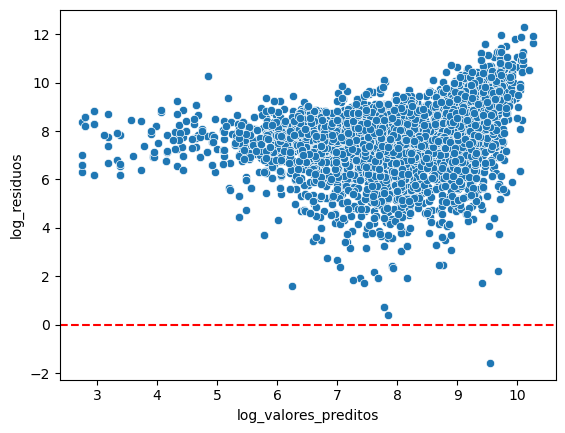

In [57]:
modelo_renda11 = smf.ols('log_residuos ~ log_valores_preditos', data = previsao_renda).fit()
print(modelo_renda11.summary())

sns.scatterplot(x = 'log_valores_preditos', y = 'log_residuos', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:               residuos   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     799.2
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:18:28   Log-Likelihood:            -1.2807e+05
No. Observations:               12427   AIC:                         2.561e+05
Df Residuals:                   12424   BIC:                         2.562e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

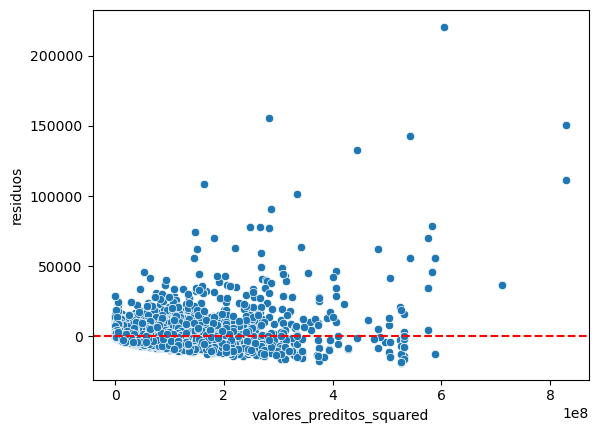

In [58]:
previsao_renda['valores_preditos_squared'] = previsao_renda['valores_preditos'] ** 2
previsao_renda['residuos_squared'] = previsao_renda['residuos'] ** 2
modelo_renda12 = smf.ols('residuos ~ valores_preditos + valores_preditos_squared', data = previsao_renda).fit()
print(modelo_renda12.summary())

sns.scatterplot(x = 'valores_preditos_squared', y = 'residuos', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:       residuos_squared   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     398.0
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           3.46e-87
Time:                        18:18:29   Log-Likelihood:            -2.7042e+05
No. Observations:               12427   AIC:                         5.408e+05
Df Residuals:                   12425   BIC:                         5.409e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.082e+08   1.04e+07  

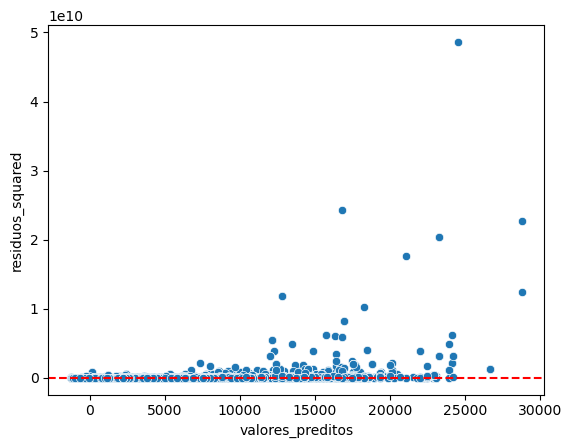

In [59]:
modelo_renda13 = smf.ols('residuos_squared ~ valores_preditos', data = previsao_renda).fit()
print(modelo_renda13.summary())

sns.scatterplot(x = 'valores_preditos', y = 'residuos_squared', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:       residuos_squared   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     628.6
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          8.60e-261
Time:                        18:18:29   Log-Likelihood:            -2.7001e+05
No. Observations:               12427   AIC:                         5.400e+05
Df Residuals:                   12424   BIC:                         5.401e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

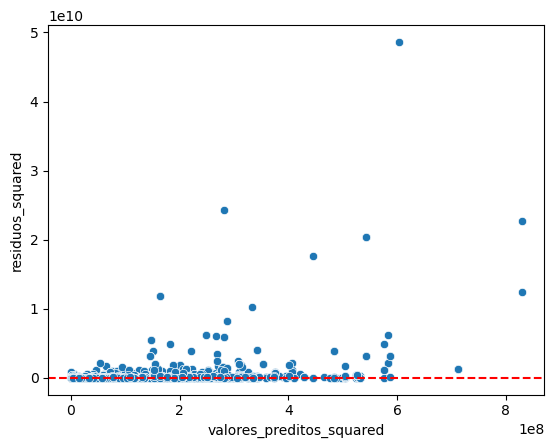

In [60]:
modelo_renda14 = smf.ols('residuos_squared ~ valores_preditos + valores_preditos_squared', data = previsao_renda).fit()
print(modelo_renda14.summary())

sns.scatterplot(x = 'valores_preditos_squared', y = 'residuos_squared', data = previsao_renda)
plt.axhline(y=0, color='r', linestyle='--')

In [61]:
r2_modelo_renda8 = modelo_renda8.rsquared
r2_modelo_renda9 = modelo_renda9.rsquared
r2_modelo_renda10 = modelo_renda10.rsquared
r2_modelo_renda11 = modelo_renda11.rsquared
r2_modelo_renda12 = modelo_renda12.rsquared
r2_modelo_renda13 = modelo_renda13.rsquared
r2_modelo_renda14 = modelo_renda14.rsquared

In [62]:
melhor_modelo = max([(r2_modelo_renda8, 'Modelo 8'),
                     (r2_modelo_renda9, 'Modelo 9'),
                     (r2_modelo_renda10, 'Modelo 10'),
                     (r2_modelo_renda11, 'Modelo 11'),
                     (r2_modelo_renda12, 'Modelo 12'),
                     (r2_modelo_renda13, 'Modelo 13'),
                     (r2_modelo_renda14, 'Modelo 14')], key=lambda x: x[0])
print(f"\nO melhor modelo é: {melhor_modelo[1]} com R² = {melhor_modelo[0]:.3f}")


O melhor modelo é: Modelo 8 com R² = 0.253


Entre os modelos criados, mantendo todas as variáveis relevantes, o que se mostrou melhor foi o 8, onde não foi feito nenhum ajuste. Foram feitos apenas ajustes de Log e Polinômio, em todas as variáveis e todas a combinações entre elas.